# Locally Weighted Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
np.random.seed(8)
X = np.random.randn(1000,1)
y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)

## Implementation

In [3]:
def wm(point, X, tau): 
    
    m = X.shape[0] 
    w = np.mat(np.eye(m)) 

    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w

In [4]:
def predict(X, y, point, tau): 
    
    m = X.shape[0] 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    point_ = np.array([point, 1]) 
    w = wm(point_, X_, tau) 
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    pred = np.dot(point_, theta) 
    
    return theta, pred

In [5]:
def plot_predictions(X, y, tau, nval):
    preds = [] 
    X_test = np.linspace(-3, 3, nval) 
    
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)

    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
     
    plt.figure(figsize=(10,6))
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.')  
    plt.show()

## Analysis

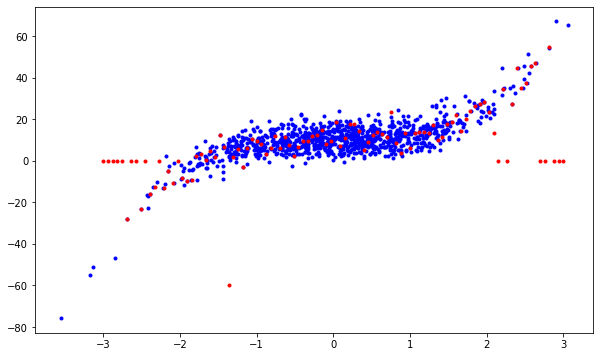

In [6]:
plot_predictions(X, y, 0.0005, 100)

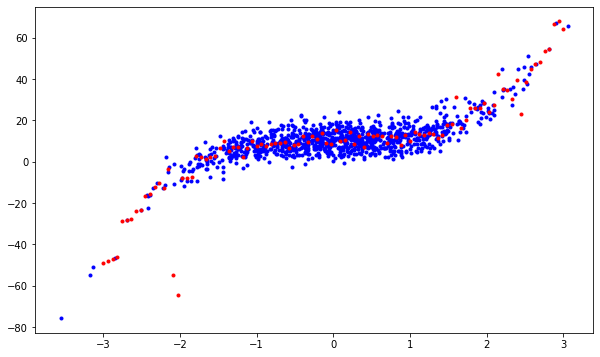

In [7]:
plot_predictions(X, y, 0.005, 100)

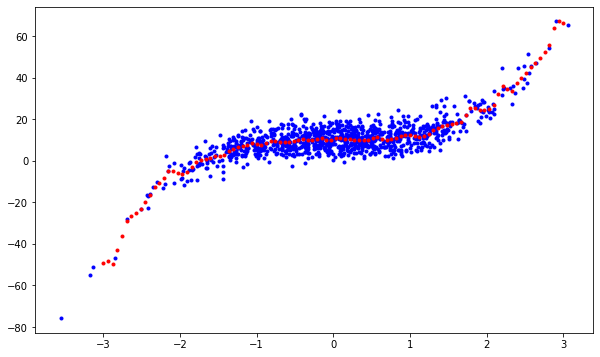

In [8]:
plot_predictions(X, y, 0.05, 100)

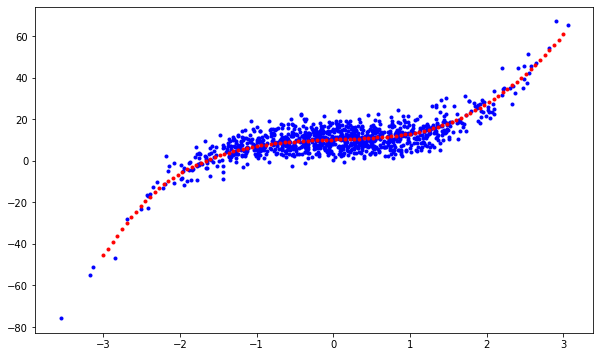

In [9]:
plot_predictions(X, y, 0.5, 100)

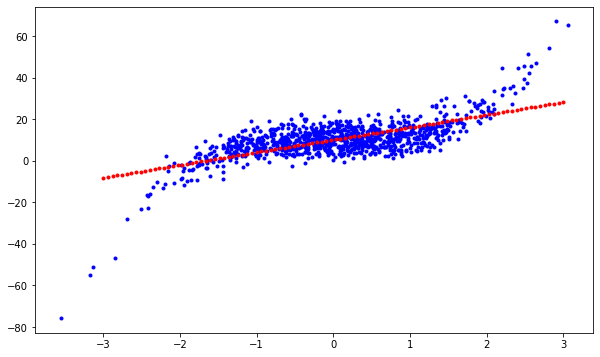

In [10]:
plot_predictions(X, y, 5, 100)